## Regression Task

In [75]:
import sklearn.datasets as load
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from timeit import default_timer as timer

dataset = load.load_svmlight_file('abalone_scale.txt', n_features = 8)

### Sections 1-3

In [76]:
# First iterate over an array of sizes in this case w
start = 10
size_and_error = dict()
size_and_time = dict()

weights = np.array([]).reshape(-1, 8)

for N in np.arange(start, dataset[0].shape[0], 10).tolist():
    X = dataset[0][:N]
    y = dataset[1][:N]
    start = timer()
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    end = timer() - start
    size_and_error[N] = mean_squared_error(y_pred, y)
    size_and_time[N] = end
    weights = np.vstack((weights, reg.coef_))

In [77]:
x = list(size_and_error.keys())
y = [size_and_error[i] for i in x]
z = [size_and_time[i] for i in x]

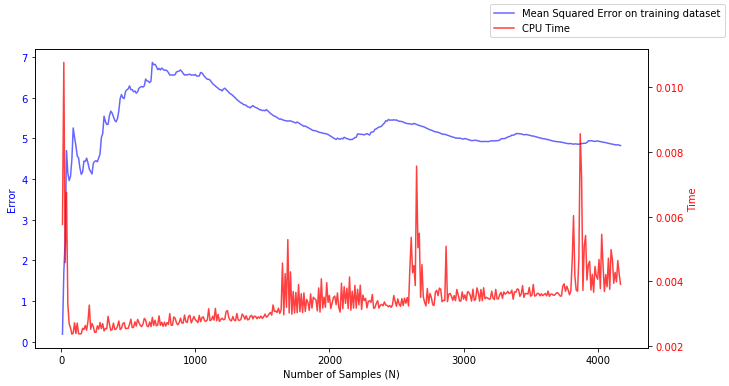

In [78]:
fig, ax1 = plt.subplots(figsize=(11,5.5))
color = 'blue'
ax1.set_xlabel('Number of Samples (N)')
ax1.set_ylabel('Error', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(x, y, color=color, alpha=0.6)
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Seconds', color=color)
ax2.plot(x, z, color=color, alpha=0.75)
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(['Mean Squared Error on training dataset','CPU Time'])
plt.show()

### Section 4

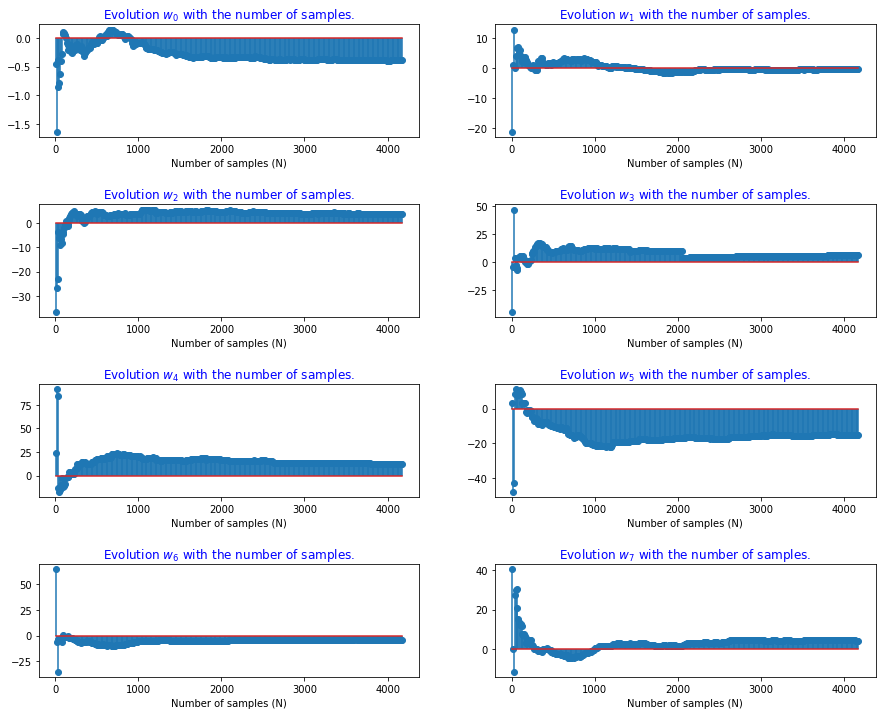

In [81]:
nrows = 4
ncols = 2
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,12))
plt.subplots_adjust(hspace = 0.6)

c = 0

for i in range(0, nrows):
    for j in range(0, ncols):
        ax = axis[i,j]
        ax.set_xlabel('Number of samples (N)')
        ax.set_title('Evolution $w_'+ str(c) +'$ with the number of samples.', color='blue')
        ax.stem(list(size_and_error.keys()), weights[:,c], use_line_collection=True)
        c+=1

## Classification Task

In [ ]:
n_features = 8
dataset = load.load_svmlight_file('cod-rna.txt', n_features = n_features)

start = 10
size_and_error = dict()
size_and_time = dict()

weights = np.array([]).reshape(-1, n_features)

step = 500

for N in np.arange(start, dataset[0].shape[0], step).tolist():
    selected = np.random.randint(low=0, high=dataset[0].shape[0], size=N)
    X = np.array([dataset[0][i].todense() for i in selected]).squeeze()
    y = np.array([dataset[1][i] for i in selected])
    start = timer()
    reg = LogisticRegression(solver='lbfgs', penalty='none', max_iter=500).fit(X, y)
    size_and_error[N] = reg.score(X,y)
    end = timer() - start
    size_and_time[N] = end
    weights = np.vstack((weights, reg.coef_))

In [ ]:
x = list(size_and_error.keys())
y = [size_and_error[i] for i in x]
z = [size_and_time[i] for i in x]

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))
color = 'blue'
ax1.set_xlabel('Number of Samples (N)')
ax1.set_ylabel('Mean Error on training set', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(x, y, color=color, alpha=0.6)

ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel('Seconds', color=color)
ax2.plot(x, z, color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(['Mean accuracy','CPU Time'])
fig.tight_layout()

In [ ]:
nrows = 4
ncols = 2
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,12))
plt.subplots_adjust(hspace = 0.6)

c = 0

for i in range(0, nrows):
    for j in range(0, ncols):
        ax = axis[i,j]
        ax.set_xlabel('Number of samples (N)')
        ax.set_title('Evolution $w_'+ str(c) +'$ with the number of samples.', color='blue')
        ax.stem(list(size_and_error.keys()), weights[:,c], use_line_collection=True)
        c+=1